In [1]:
import zipfile
with zipfile.ZipFile("/content/drive/My Drive/Dog_Cat.zip",'r') as f:
    f.extractall('')

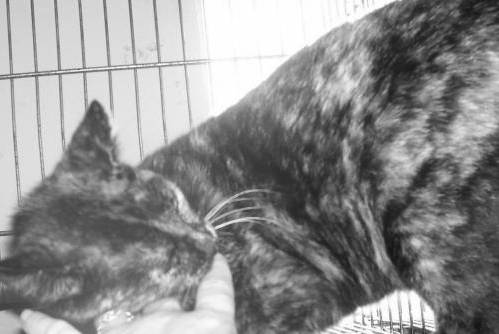

(334, 499)

In [2]:
import cv2
import os
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/dog vs cat/dataset/test_set/cats/cat.4006.jpg',0)
w_img='img'
cv2_imshow(img)
img.shape

In [3]:
#Trainig Data set
img_name=os.listdir('/content/dog vs cat/dataset/training_set/dogs') #For Dogs (1)
x_train = []
y_train = []
for i in range(len(img_name)):
  try: #in case there is no image present
      img=cv2.imread('/content/dog vs cat/dataset/training_set/dogs/'+img_name[i],0)
      img=cv2.resize(img,(255,255))
      x_train.append(img)
      y_train.append(1)
  except:
    pass


In [4]:
img_name=os.listdir('/content/dog vs cat/dataset/training_set/cats') #For Cats (0)
for i in range(len(img_name)):
  try: #in case there is no image present
      img=cv2.imread('/content/dog vs cat/dataset/training_set/cats/'+img_name[i],0)
      img=cv2.resize(img,(255,255))
      x_train.append(img)
      y_train.append(0)
  except:
    pass
      

In [5]:
#For testing data
img_name=os.listdir('/content/dog vs cat/dataset/test_set/dogs') #For Dog (1)
x_test = []
y_test = []
for i in range(len(img_name)):
    try:
      img = cv2.imread('/content/dog vs cat/dataset/test_set/dogs/'+img_name[i],0)
      img = cv2.resize(img,(255,255))
      x_test.append(img)
      y_test.append(1)
    except:
      pass

In [6]:
img_name=os.listdir('/content/dog vs cat/dataset/test_set/cats') #For Cats (0)
for i in range(len(img_name)):
    try:
      img = cv2.imread('/content/dog vs cat/dataset/test_set/cats/'+img_name[i],0)
      img = cv2.resize(img,(255,255))
      x_test.append(img)
      y_test.append(0)
    except:
      pass

In [7]:
#array conversion 
import numpy as np
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train =x_train/255
x_test = x_test/255
x_test.shape

(2000, 255, 255)

In [8]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)
x_train.shape

(8000, 255, 255, 1)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout , Conv2D ,MaxPooling2D, Flatten
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(256,256,1)))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
x_train.shape

(8000, 255, 255, 1)

In [11]:
model.fit(x_train,y_train,epochs=10,batch_size=100,validation_data=(x_test,y_test))

Epoch 1/10


ValueError: ignored